In [1]:
# Combining Plots with Matplotlib
# Objective: Combine multiple plots into a single figure using Matplotlib's subplots.

In [2]:
import matplotlib.pyplot as plt
x = [0, 1, 2, 3, 4, 5]
y1 = [0, 1, 4, 9, 16, 25]
y2 = [0, -1, -4, -9, -16, -25]



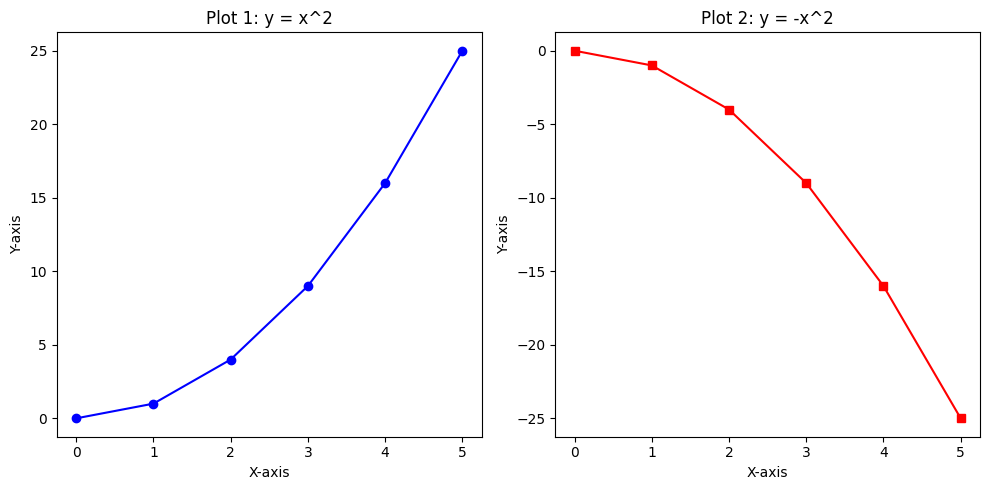

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(x, y1, color='blue', linestyle='-', marker='o')
axes[0].set_title('Plot 1: y = x^2')
axes[0].set_xlabel('X-axis')
axes[0].set_ylabel('Y-axis')
axes[1].plot(x, y2, color='red', linestyle='-', marker='s')
axes[1].set_title('Plot 2: y = -x^2')
axes[1].set_xlabel('X-axis')
axes[1].set_ylabel('Y-axis')
plt.tight_layout()
plt.show()